## Linear Regression

Another way to analyze horsepower is to look at the main attributes of a car’s engine: number of cylinders and engine size (displacement). A more powerful engine (as measured by horsepower) usually means more cylinders and a larger displacement value. This relationship is shown in the following visualization.

https://code.datasciencedojo.com/tshrivas/dojoHub/tree/supervised-learning/Auto%20MPG%20Data%20Set

### Notebook Imports

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set()
%matplotlib inline

### Gather the data

#### about the data

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

[DataSource: ](https://archive.ics.uci.edu/ml/datasets/auto+mpg)


In [585]:
# reading the data
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [586]:
df.tail() # looking at last 5 rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


#### datapoints and features

In [587]:
type(df)

pandas.core.frame.DataFrame

In [588]:
df.shape

(398, 9)

In [589]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [590]:
df.count()

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
car name        398
dtype: int64

### Data Exploration using pandas

#### Data cleaning - checking for missing values

In [591]:
# checking the null value if any

df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [592]:
df.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [594]:
df['Country_code'] = df.origin.replace([1,2,3],['USA','Europe','Japan'])

In [595]:
df = pd.get_dummies(df,prefix=['Country'],columns=['Country_code'])

In [596]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Country_Europe,Country_Japan,Country_USA
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0,0,1
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0,0,1
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0,0,1
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0,0,1
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0,0,1


In [597]:
df['company_name'] =df['car name'].str.extract('(^.*?)\s')

In [598]:
#df['company_name'].value_counts()

In [599]:
# calculating the average value

ad=0
for i in range(len(df['horsepower'])):
    if (df['horsepower'][i]!='?'):
        ad=ad+float(df['horsepower'][i])

ad=ad/len(df['horsepower'])
ad
            


102.89447236180905

In [600]:
df['horsepower']= df['horsepower'].replace('?',ad)

In [601]:
# changing the datatype of horsepower

df['horsepower']=pd.to_numeric(df['horsepower'])

In [602]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [603]:
# approch1 :  using frequency encoding

fe = df.groupby('company_name').size()/len(df)
df.loc[:,'company_encode'] = df['company_name'].map(fe)

In [604]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Country_Europe,Country_Japan,Country_USA,company_name,company_encode
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0,0,1,chevrolet,0.108040
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0,0,1,buick,0.042714
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0,0,1,plymouth,0.077889
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0,0,1,amc,0.070352
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0,0,1,ford,0.128141


In mean target encoding for each category in the feature label is decided with the mean value of the target variable on a training data. This encoding method brings out the relation between similar categories, but the connections are bounded within the categories and target itself. The advantages of the mean target encoding are that it does not affect the volume of the data and helps in faster learning. Usually, Mean encoding is notorious for over-fitting; thus, a regularization with cross-validation or some other approach is a must on most occasions

In [605]:
# approach1: using the mean encoding

mean_encode = df.groupby('company_name')['mpg'].mean()
df.loc[:,'company_mean_encode']=df['company_name'].map(mean_encode)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Country_Europe,Country_Japan,Country_USA,company_name,company_encode,company_mean_encode
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0,0,1,chevrolet,0.108040,20.472093
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0,0,1,buick,0.042714,19.182353
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0,0,1,plymouth,0.077889,21.703226
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0,0,1,amc,0.070352,18.246429
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0,0,1,ford,0.128141,19.694118


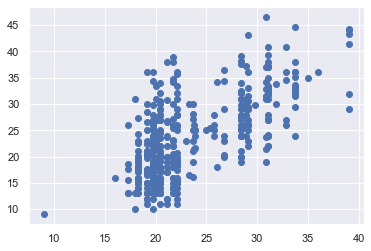

In [606]:
#
plt.scatter(df['company_mean_encode'],df['mpg'])
plt.show()

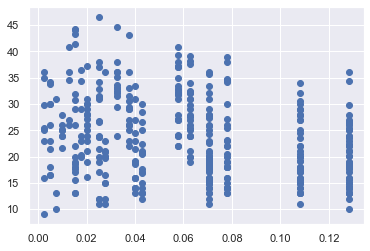

In [607]:
# we can see that the frequency is not related to target variable, so this is not a good approach
plt.scatter(df['company_encode'],df['mpg'])
plt.show()

In [608]:
data = df.copy()

In [609]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Country_Europe,Country_Japan,Country_USA,company_name,company_encode,company_mean_encode
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0,0,1,chevrolet,0.108040,20.472093
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0,0,1,buick,0.042714,19.182353
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0,0,1,plymouth,0.077889,21.703226
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0,0,1,amc,0.070352,18.246429
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0,0,1,ford,0.128141,19.694118


In [610]:
# MODEL 1:


data1=data.drop(['car name','company_name', 'company_encode','origin','Country_Europe','Country_Japan','Country_USA'], axis=1)

In [611]:
data1=clean_dataset(data1)

### Data Visualization

#### Histograms

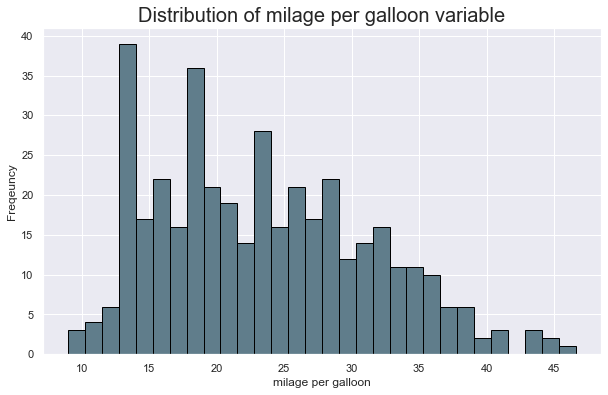

In [39]:
plt.figure(figsize=(10,6))
plt.hist(df['mpg'],bins=30,ec='black',color='#607D8B')
plt.xlabel('milage per galloon')
plt.ylabel('Freqeuncy')
plt.title('Distribution of milage per galloon variable', fontsize=20)
plt.show()

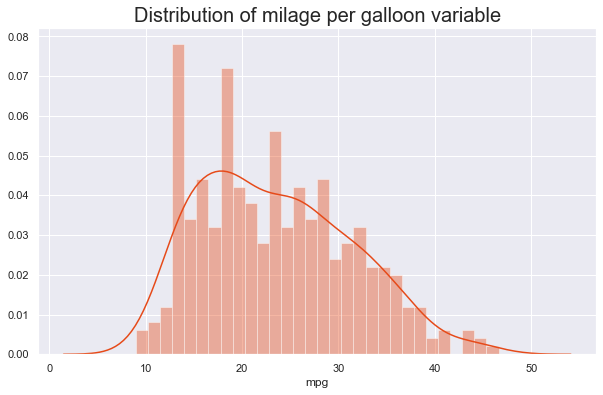

In [52]:
# using seaborn to visualize mpg variable
plt.figure(figsize=(10,6))
sns.distplot(df['mpg'],bins=30,color='#E64A19')
plt.title('Distribution of milage per galloon variable', fontsize=20)

plt.show()

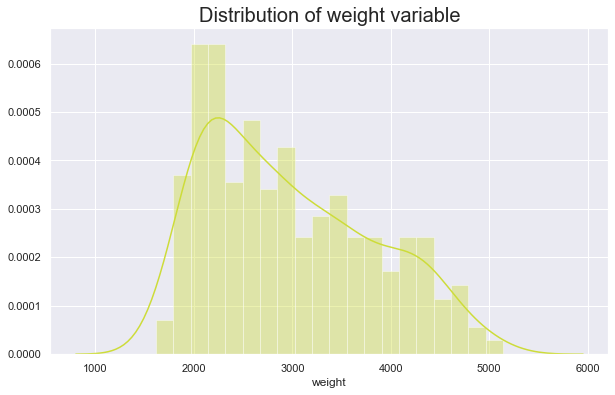

In [53]:
# distribution of weight 

plt.figure(figsize=(10,6))
sns.distplot(df['weight'],bins=20,color='#CDDC39')
plt.title('Distribution of weight variable', fontsize=20)

plt.show()

In [61]:
df['displacement']

0      307.0
1      350.0
2      318.0
3      304.0
4      302.0
       ...  
393    140.0
394     97.0
395    135.0
396    120.0
397    119.0
Name: displacement, Length: 398, dtype: float64

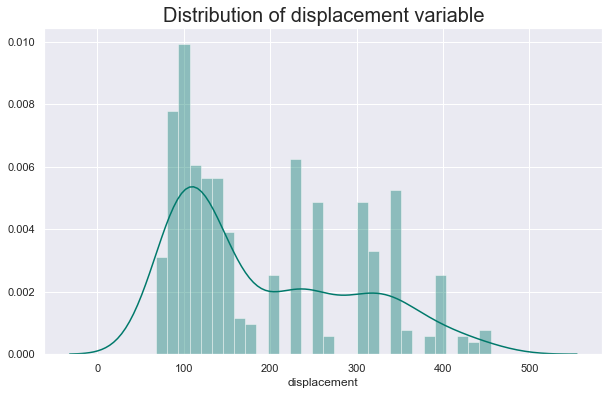

In [59]:
plt.figure(figsize=(10,6))
sns.distplot(df['displacement'],bins=30,color='#00796B')
plt.title('Distribution of displacement variable', fontsize=20)

plt.show()

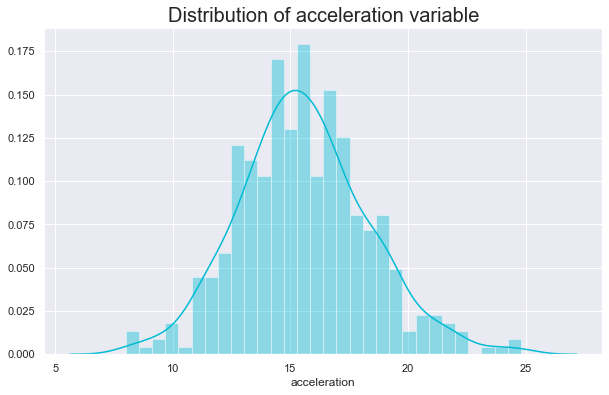

In [60]:
plt.figure(figsize=(10,6))
sns.distplot(df['acceleration'],bins=30,color='#00BCD4')
plt.title('Distribution of acceleration variable', fontsize=20)

plt.show()

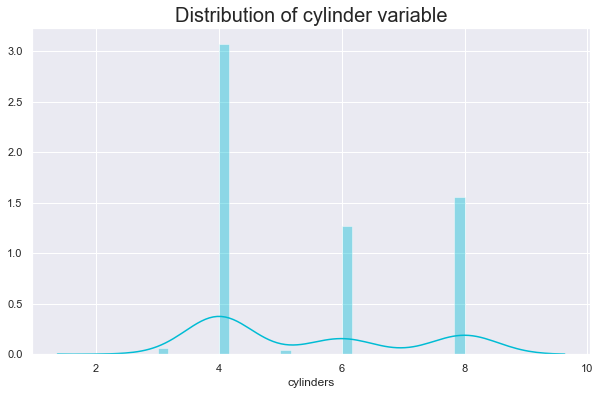

In [63]:
plt.figure(figsize=(10,6))
sns.distplot(df['cylinders'],bins=30,color='#00BCD4')
plt.title('Distribution of cylinder variable', fontsize=20 )

plt.show()

## something's wrong!!!

In [97]:
df['cylinders'].value_counts() #index/discrete variable

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

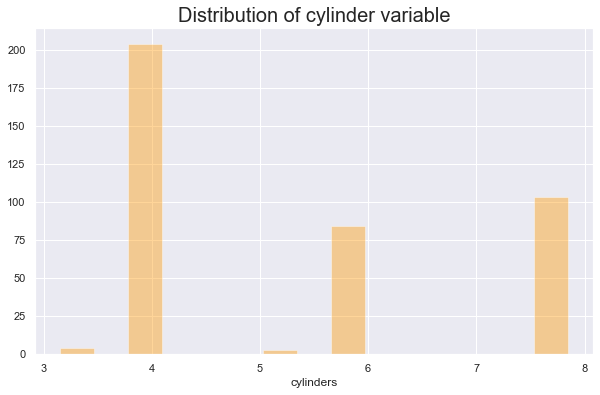

In [84]:
plt.figure(figsize=(10,6))
sns.distplot(df['cylinders'],bins=8,color='#FF9800', kde=False, hist_kws={'rwidth':0.5})
plt.title('Distribution of cylinder variable', fontsize=20)

plt.show()



In [77]:
# for categorical variable 
frequency = df['cylinders'].value_counts()
#type(frequency)

# frequency.index
frequency.axes[0]

Int64Index([4, 8, 6, 3, 5], dtype='int64')

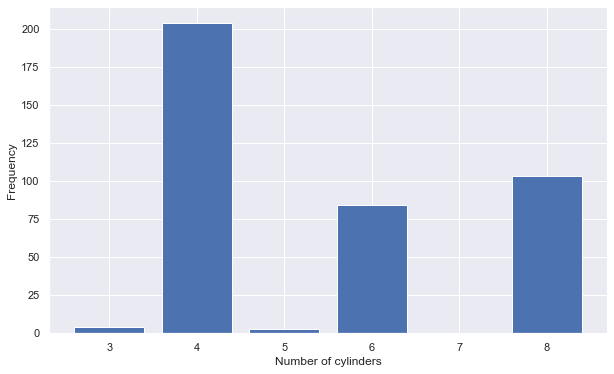

In [83]:
#bar chart  - no need to specify bins

plt.figure(figsize=(10,6))
plt.bar(frequency.axes[0],height=frequency.values)
plt.xlabel('Number of cylinders')
plt.ylabel('Frequency')
plt.show()

In [93]:
df['car name'].value_counts() # need to one hot encode the categorical variable

ford pinto                  6
ford maverick               5
toyota corolla              5
amc matador                 5
chevrolet impala            4
                           ..
ford granada                1
honda accord cvcc           1
volkswagen rabbit custom    1
mazda glc custom            1
ford torino                 1
Name: car name, Length: 305, dtype: int64

In [95]:
df['origin'].value_counts() # index variable, 1 refers to NA, 2 Europe and 3 Asia

1    249
3     79
2     70
Name: origin, dtype: int64

### Descriptive Statistics

In [96]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### Correlation

#### $$ \rho_{X,Y}= CORR(X,Y) $$
#### $$ -1.0  \leq  \rho_{X,Y}  \leq  1.0 $$

In [103]:
df['mpg'].corr(df['cylinders']) 

#negative correlation -- more the number of cylinders, heavier the machine, takes more fuel thus less milage

-0.7753962854205543

In [104]:
df['mpg'].corr(df['displacement']) 

#displacement is realted to engine size which relates to number of cylinders, thus this is also negatively correlated

-0.8042028248058979

In [106]:
df['mpg'].corr(df['weight'])

# greater the engine size, heaver the machine

-0.8317409332443351

In [108]:
df['mpg'].corr(df['acceleration']) 

# fairly correlated, heavier the machine, it's top-speed reduces thus reducing the acceration thus reducing the mileage 


0.42028891210165065

In [110]:
df['mpg'].corr(df['model year']) 

# new model are having better milage compared to old 


0.5792671330833097

In [113]:
# looking at correlations (Pearson's is default) at the same time

df.corr() 

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [122]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

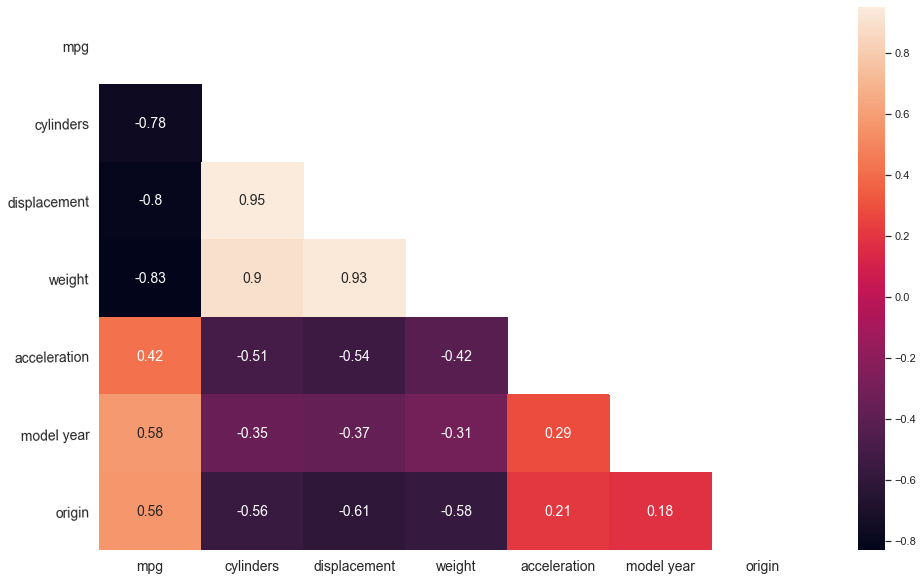

In [135]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),mask= mask,annot=True, annot_kws={'size':14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14,rotation=True)
plt.show()

In [164]:
# cylinder is an index/discrete variable, so it not useful to infer the value from the correlation chart

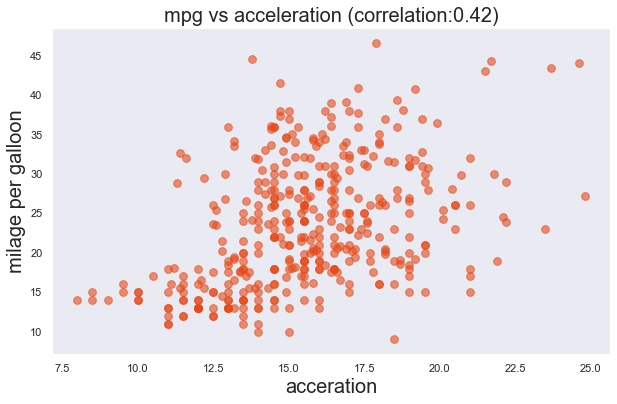

In [168]:
# lowest value for correlation with mpg acceraltion: 

corr_mpg_acc = round(df['mpg'].corr(df['acceleration']),3)
plt.figure(figsize=(10,6))
plt.title(f'mpg vs acceleration (correlation:{corr_mpg_acc})', fontsize=20)
plt.scatter(df['acceleration'],df['mpg'],alpha=0.6,s=60,color='#E64A19')
plt.xlabel('acceration',fontsize=20)
plt.ylabel('milage per galloon',fontsize=20)
plt.show()

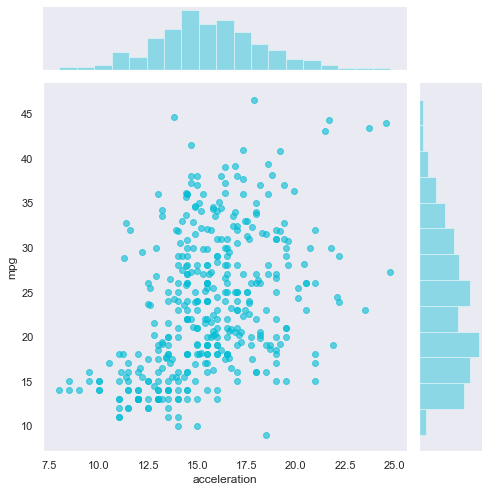

In [161]:
sns.set() # change to style to default 
sns.set_style('dark')
sns.jointplot(df['acceleration'],df['mpg'],height=7,color='#00BCD4',joint_kws={'alpha':0.6})
plt.show()

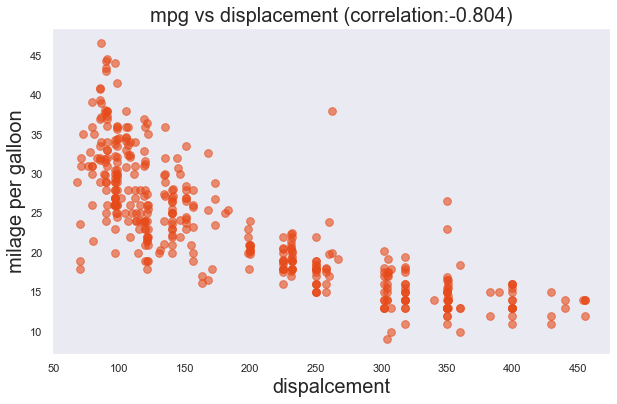

In [169]:
corr_mpg_dis = round(df['mpg'].corr(df['displacement']),3)
plt.figure(figsize=(10,6))
plt.title(f'mpg vs displacement (correlation:{corr_mpg_dis})', fontsize=20)
plt.scatter(df['displacement'],df['mpg'],alpha=0.6,s=60,color='#E64A19')
plt.xlabel('dispalcement',fontsize=20)
plt.ylabel('milage per galloon',fontsize=20)
plt.show()

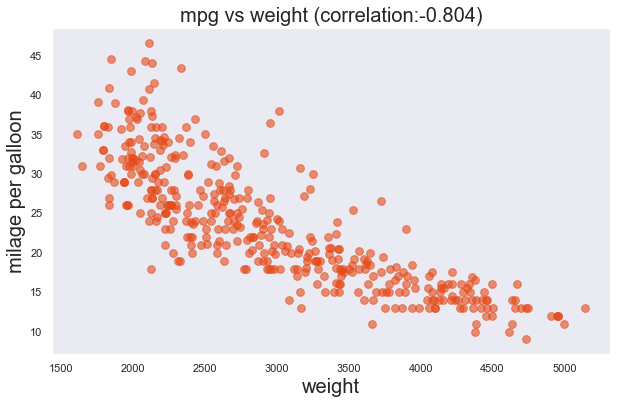

In [170]:
corr_mpg_weight = round(df['mpg'].corr(df['weight']),3)
plt.figure(figsize=(10,6))
plt.title(f'mpg vs weight (correlation:{corr_mpg_dis})', fontsize=20)
plt.scatter(df['weight'],df['mpg'],alpha=0.6,s=60,color='#E64A19')
plt.xlabel('weight',fontsize=20)
plt.ylabel('milage per galloon',fontsize=20)
plt.show()

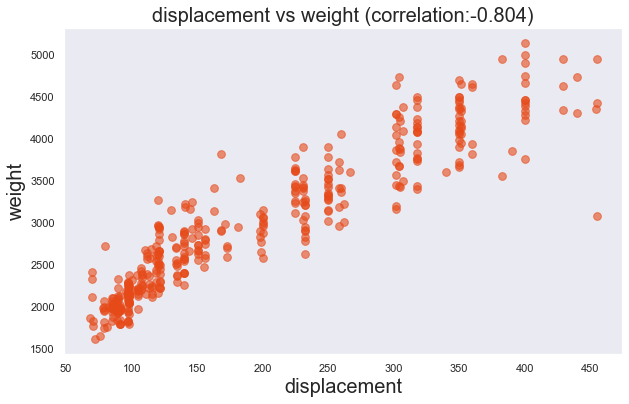

In [171]:
corr_dis_weight = round(df['displacement'].corr(df['weight']),3)
plt.figure(figsize=(10,6))
plt.title(f'displacement vs weight (correlation:{corr_mpg_dis})', fontsize=20)
plt.scatter(df['displacement'],df['weight'],alpha=0.6,s=60,color='#E64A19')
plt.xlabel('displacement',fontsize=20)
plt.ylabel('weight',fontsize=20)
plt.show()

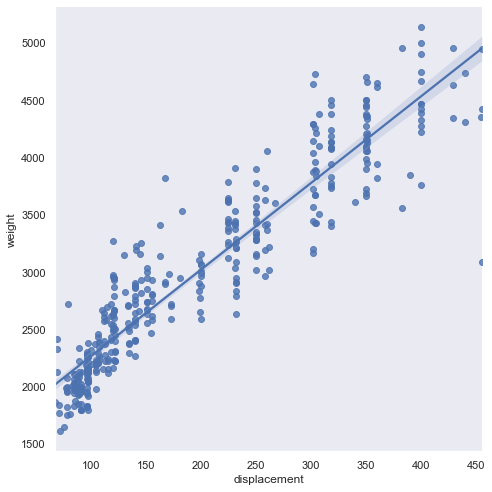

In [176]:
# running a regression line between two features 

sns.lmplot(x='displacement',y='weight',data=df, height=7)
plt.show()

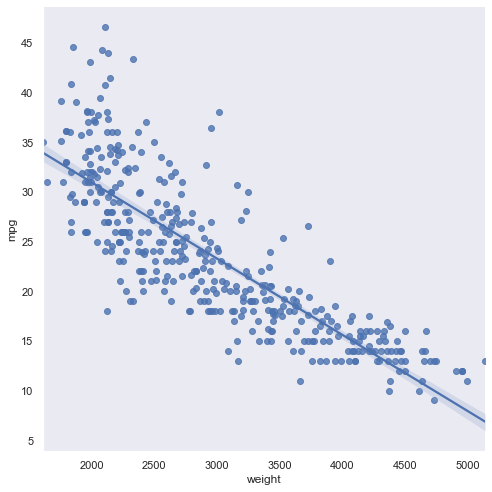

In [175]:
sns.lmplot(x='weight',y='mpg',data=df, height=7)
plt.show()

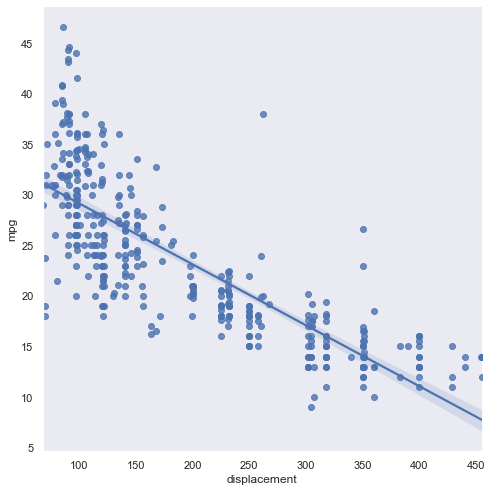

In [178]:
sns.lmplot(x='displacement',y='mpg',data=df, height=7)
plt.show()

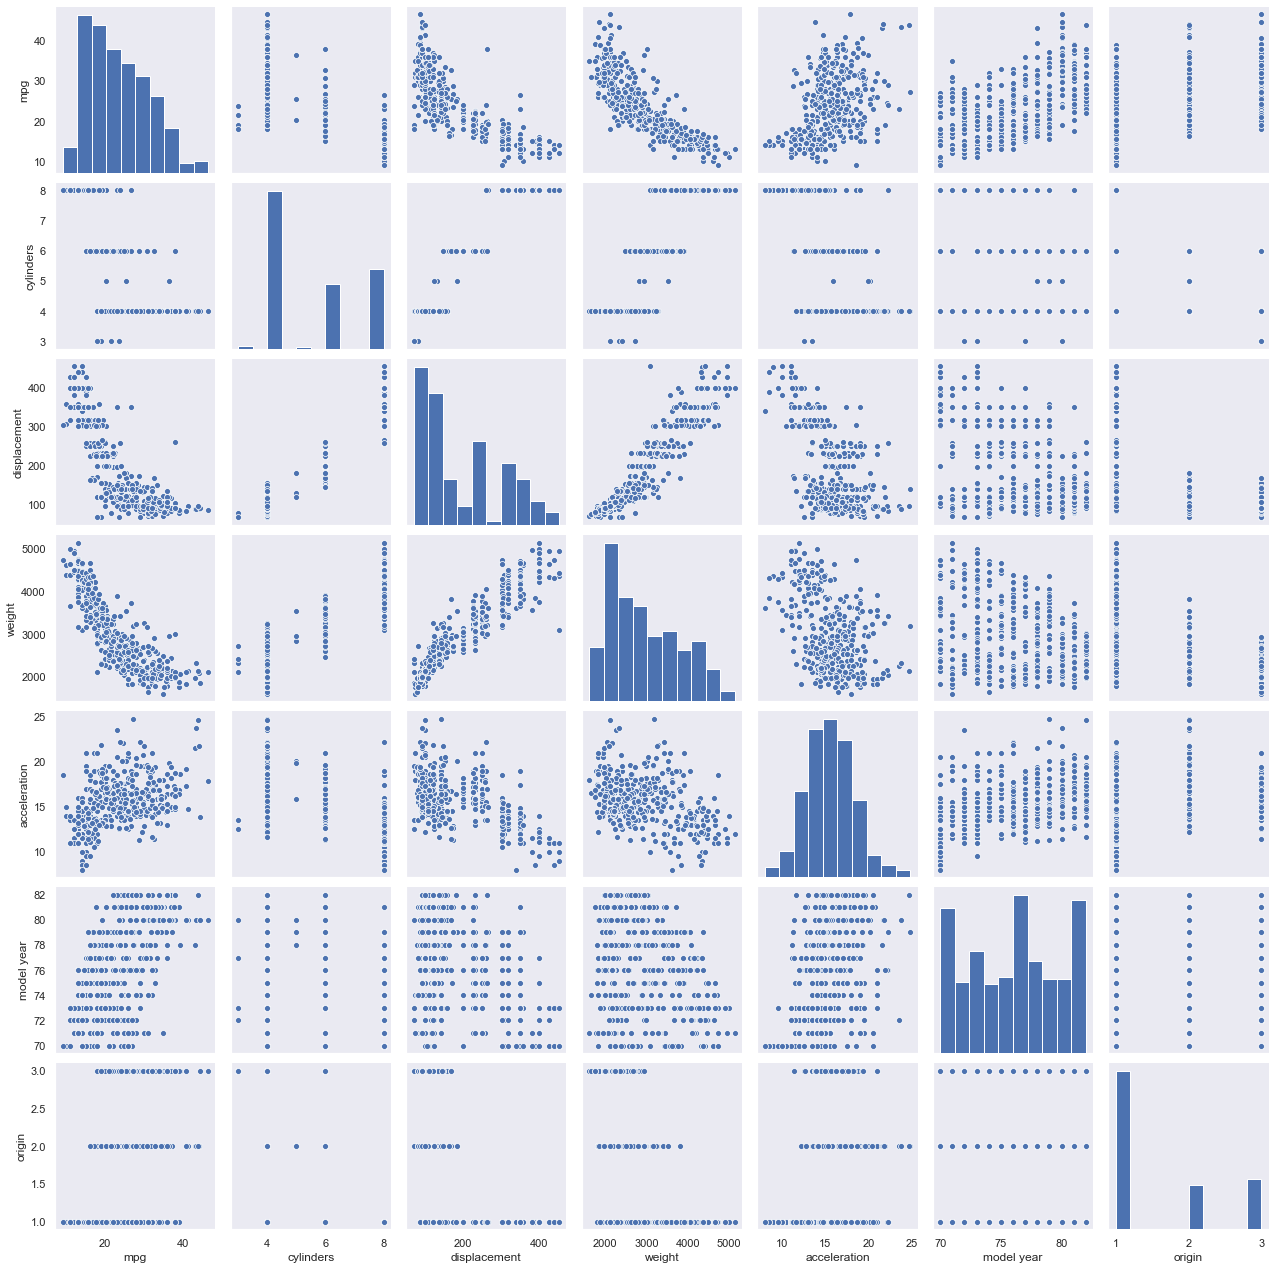

CPU times: user 15.6 s, sys: 202 ms, total: 15.8 s
Wall time: 16.2 s


In [179]:
%%time
sns.pairplot(data=df)
plt.show()

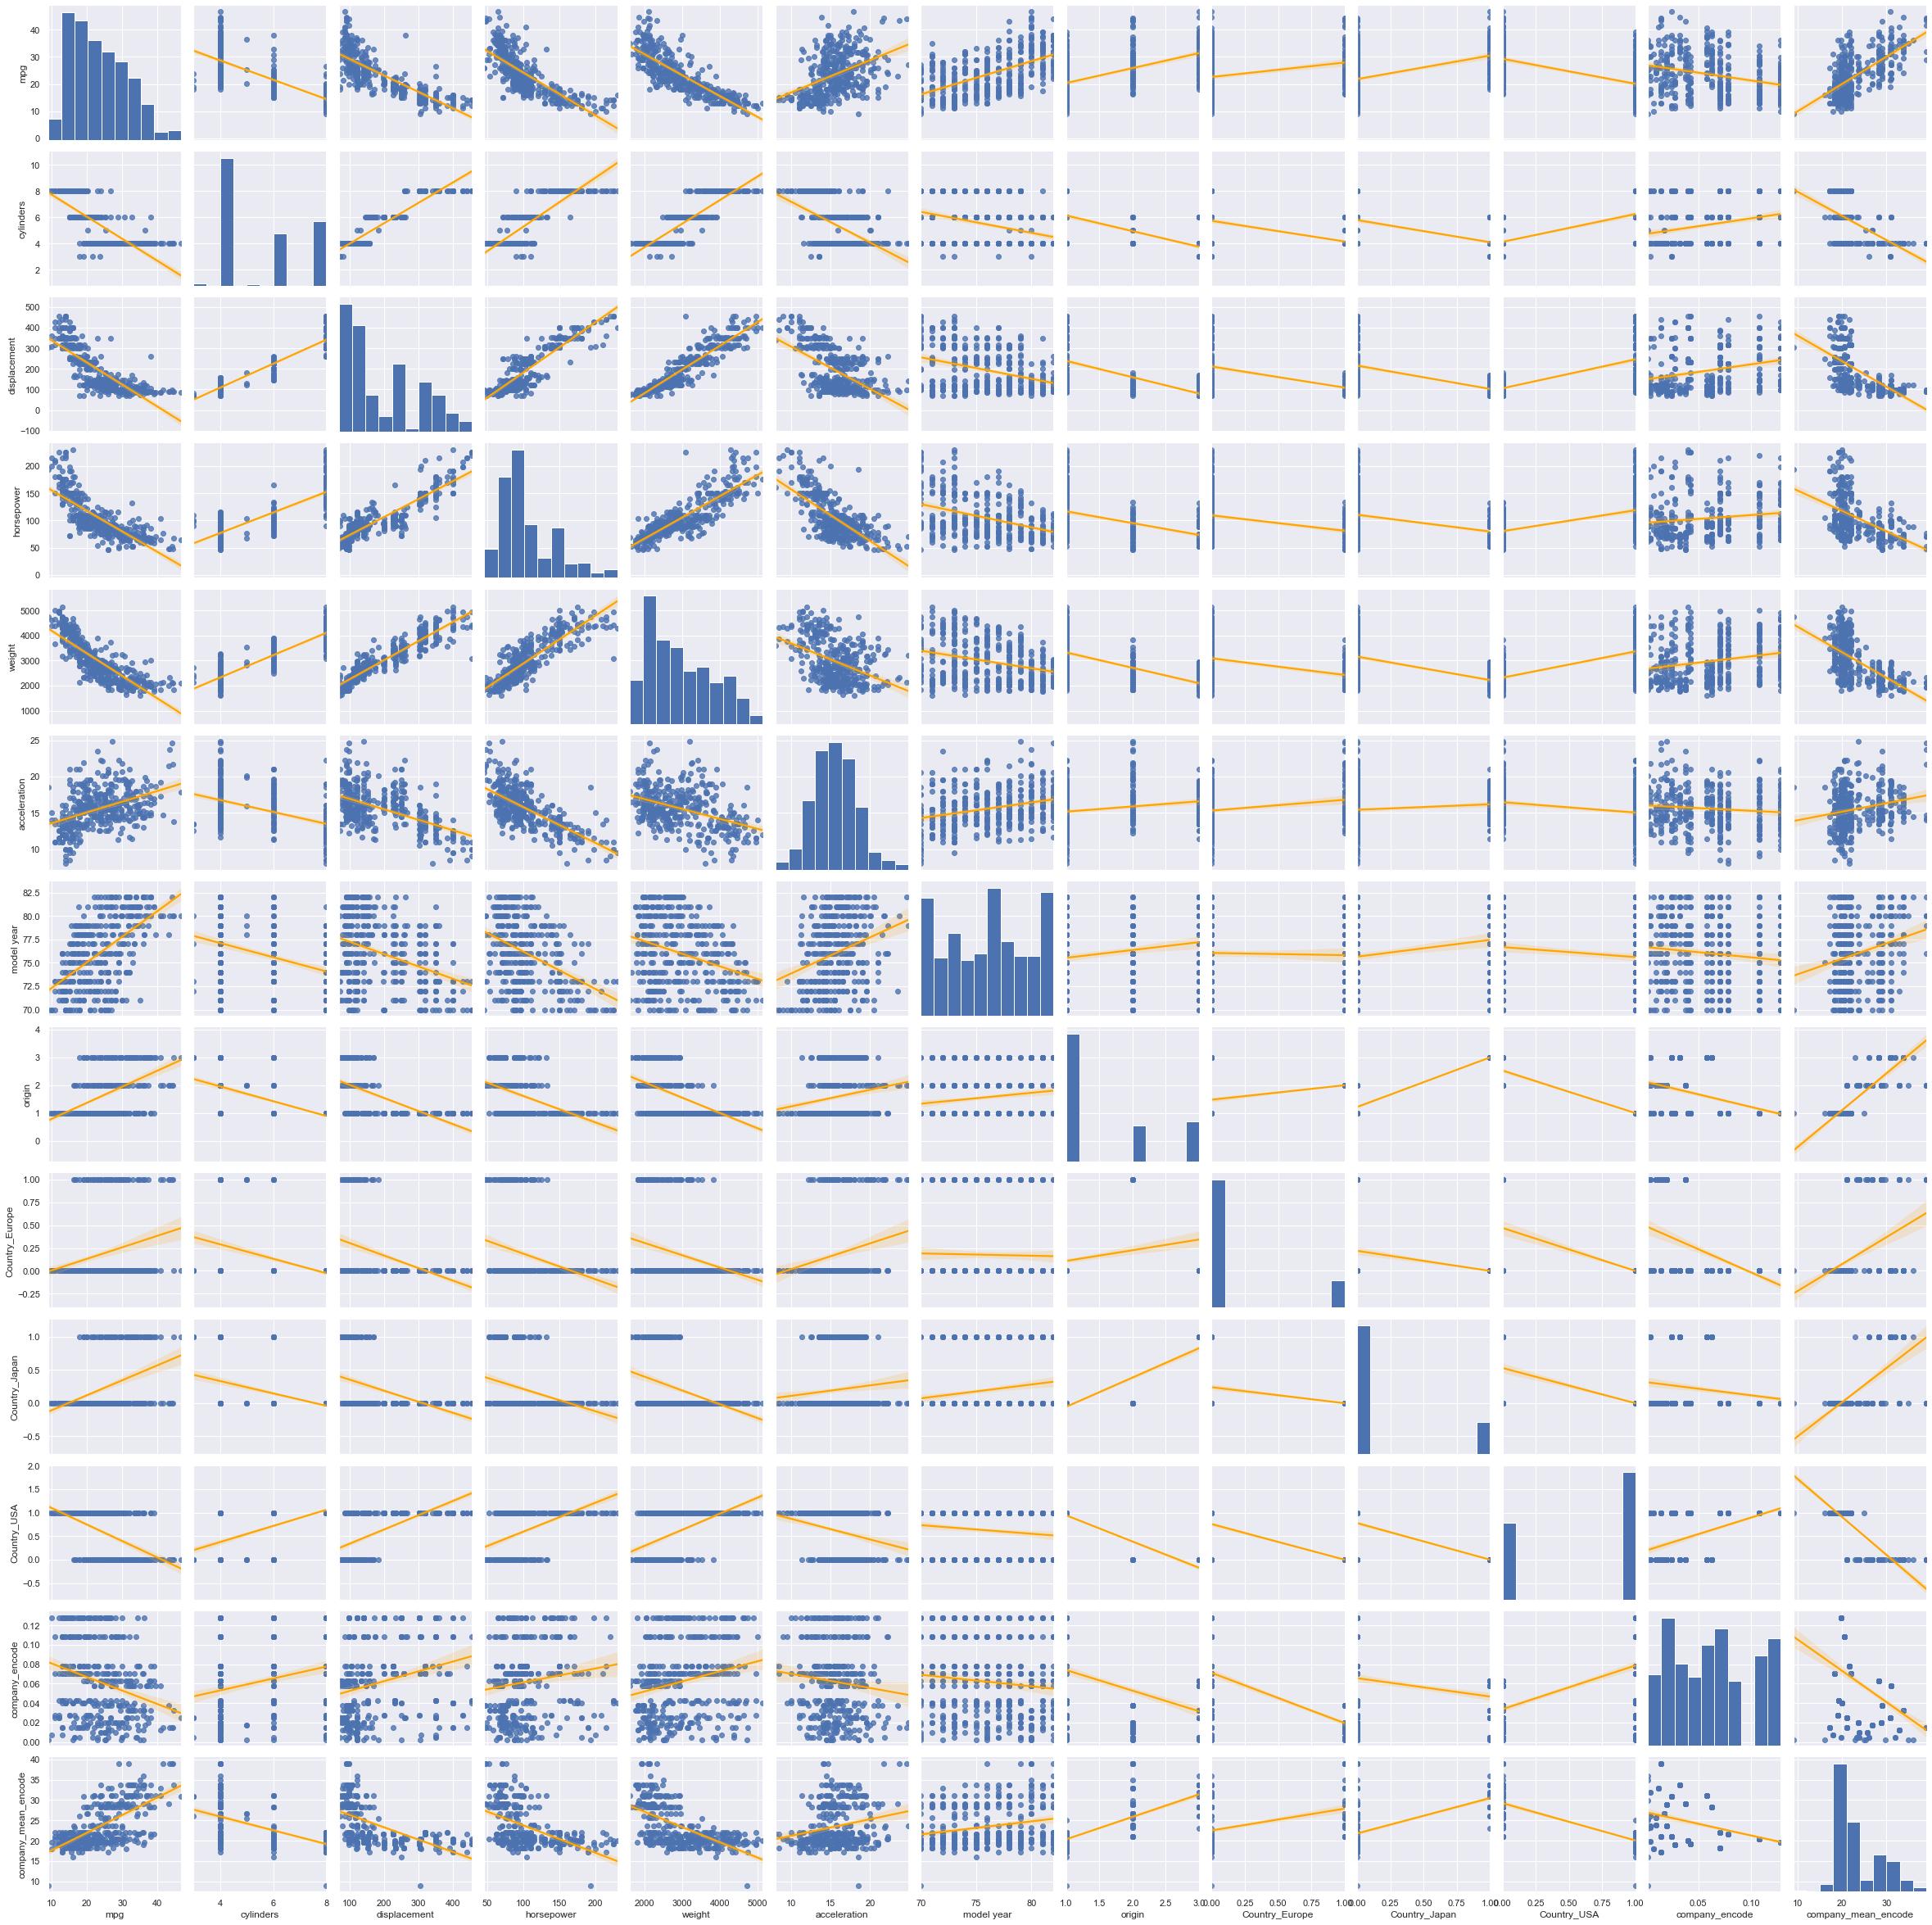

CPU times: user 1min 49s, sys: 1.16 s, total: 1min 50s
Wall time: 1min 30s


In [410]:
%%time
sns.pairplot(df,kind='reg',plot_kws={'line_kws':{'color':'orange'}})
plt.show()

It is a way to utilize the frequency of the categories as labels. In the cases where the frequency is related somewhat with the target variable, it helps the model to understand and assign the weight in direct and inverse proportion, depending on the nature of the data. 

### Train test- split

In [612]:
target = data1['mpg']
features = data1.drop(['mpg'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2, random_state=404)

In [613]:
# percent of training data

len(X_train)/len(features)

0.797979797979798

In [614]:
features.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,company_mean_encode
0,8.0,307.0,130.0,3504.0,12.0,70.0,20.472093
1,8.0,350.0,165.0,3693.0,11.5,70.0,19.182353
2,8.0,318.0,150.0,3436.0,11.0,70.0,21.703226
3,8.0,304.0,150.0,3433.0,12.0,70.0,18.246429
4,8.0,302.0,140.0,3449.0,10.5,70.0,19.694118


In [615]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 397
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cylinders            396 non-null    float64
 1   displacement         396 non-null    float64
 2   horsepower           396 non-null    float64
 3   weight               396 non-null    float64
 4   acceleration         396 non-null    float64
 5   model year           396 non-null    float64
 6   company_mean_encode  396 non-null    float64
dtypes: float64(7)
memory usage: 24.8 KB


### Multivariable Regression

In [616]:
regr = LinearRegression()
regr.fit(X_train,y_train)

# calculating the r-squared value

print('r-squared for training data: ', regr.score(X_train,y_train))
print('r-squared for test data: ', regr.score(X_test,y_test))

print('intercept: ', regr.intercept_)
pd.DataFrame(regr.coef_,index=X_train.columns,columns=['coef'])

r-squared for training data:  0.8385607330490888
r-squared for test data:  0.8396122330227236
intercept:  -24.341240462612458


,coef
cylinders,-0.672990
displacement,0.023840
horsepower,-0.003578
weight,-0.006480
acceleration,0.160317
model year,0.719903
company_mean_encode,0.394367


In [617]:
#note: displacement should be -ve but we have positve sign, could be due to multicollinearity

### Data Transformation

In [618]:
data['mpg'].skew()

0.45706634399491913

In [619]:
y_log = np.log(data['mpg'])
y_log.head()

0    2.890372
1    2.708050
2    2.890372
3    2.772589
4    2.833213
Name: mpg, dtype: float64

In [620]:
y_log.skew()

-0.13649360900999818

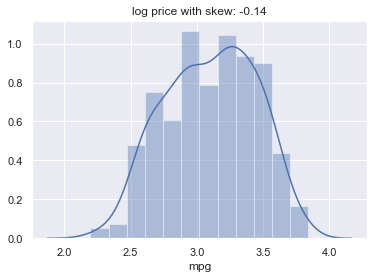

In [621]:
plt.title(f'log price with skew: {round(y_log.skew(),2)}')
sns.distplot(y_log) # somewhat normally distributed
plt.show()

In [622]:
skew_without_transfrom = data['mpg'].skew()

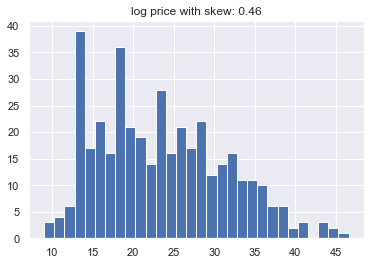

In [623]:
plt.title(f'log price with skew: {round(skew_without_transfrom,2)}')

plt.hist(data['mpg'],bins=30)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


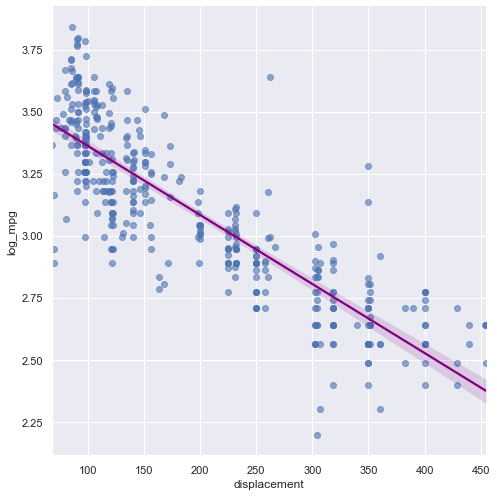

In [624]:
transformed_data = features.copy()
transformed_data['log_mpg']=y_log

sns.lmplot(x='displacement',y='log_mpg', data=transformed_data, size=7, scatter_kws={'alpha':0.6}, line_kws={'color':'purple'})
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


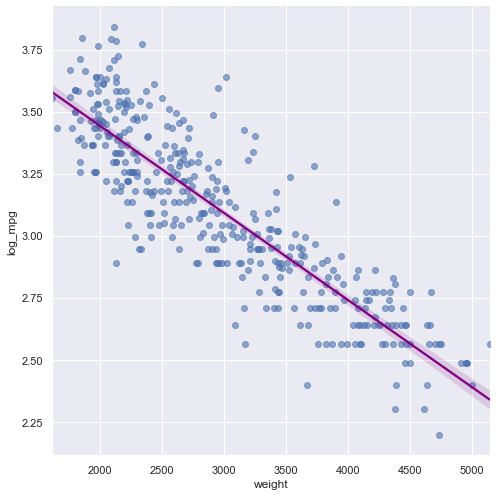

In [625]:
sns.lmplot(x='weight',y='log_mpg', data=transformed_data, size=7, scatter_kws={'alpha':0.6}, line_kws={'color':'purple'})
plt.show()

## Regression using the log mpg

In [626]:
## using the log model:

target = np.log(data1['mpg']) 
features = data1.drop(['mpg'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2, random_state=404)

regr = LinearRegression()
regr.fit(X_train,y_train)

# calculating the r-squared value

print('r-squared for training data: ', regr.score(X_train,y_train))
print('r-squared for test data: ', regr.score(X_test,y_test))

print('intercept: ', regr.intercept_)
pd.DataFrame(regr.coef_,index=X_train.columns,columns=['coef'])

r-squared for training data:  0.8866317142265066
r-squared for test data:  0.886174147050371
intercept:  1.5288755055102163


,coef
cylinders,-0.037393
displacement,0.000836
horsepower,-0.000978
weight,-0.000260
acceleration,0.000724
model year,0.028967
company_mean_encode,0.011662


$$Conclusion$$ Recuding the skewness of the target variable mpg, we have increased the R-squared value for both traing and test data
and also result in a better fit model.

In [627]:
np.exp(0.000260)

1.0002600338029295

### P-values and evaluating coefficients

In [628]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     344.1
Date:                Tue, 05 Jan 2021   Prob (F-statistic):          1.67e-141
Time:                        16:30:24   Log-Likelihood:                 238.80
No. Observations:                 316   AIC:                            -461.6
Df Residuals:                     308   BIC:                            -431.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.5289      0.178      8.605      0.000       1.179       1.878
cylinders              -0.0374      0.013     -2.872      0.004      -0.063      -0.012
displacement            0.0008      0.000      2.826      0.005       0.000       0.001
horsepower             -0.0010      0.001     -1.928      0.055      -0.002    2.03e-05
weight                 -0.0003   2.66e-05     -9.788      0.000      -0.000      -0.000
acceleration            0.0007      0.004      0.195      0.846      -0.007       0.008
model year              0.0290      0.002     15.108      0.000       0.025       0.033
company_mean_encode     0.0117      0.002      6.983      0.000       0.008       0.015
==============================================================================
Omnibus:                       10.125   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.966
Skew:                          -0.311   Prob(JB):                      0.00252
Kurtosis:                       3.722   Cond. No.                     8.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [629]:
### note: horsepower and acceleration has p-value greater than 0.05 

### Testing for multicollinearity

$$ horsepower = \alpha_0 + \alpha_1 cylinder+ \alpha_2 displacement + ... +\alpha_7 comanpy-mean-encode$$

$$ VIF_{horsepower} = \frac{1}{1-(R_{horsepower}^2)} $$

In [630]:
# vif = [] #empty list
for i in range(len(X_incl_const.columns)):
    print(f'{X_incl_const.columns[i]} {variance_inflation_factor(exog=X_incl_const.values, exog_idx=i)}')
#     vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))

const 752.703501818473
cylinders 11.538779567382152
displacement 22.598588775515974
horsepower 8.868901704634176
weight 12.097258166713974
acceleration 2.58980240646556
model year 1.216206298701442
company_mean_encode 1.7134655340949276


In [631]:
## using list comprehension

vif =[variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range(len(X_incl_const.columns))]
vif_df= pd.DataFrame({'coefficient names': X_incl_const.columns, 'vif values': np.around(vif,2) })

In [632]:
vif_df

,coefficient names,vif values
0,const,752.70
1,cylinders,11.54
2,displacement,22.60
3,horsepower,8.87
4,weight,12.10
5,acceleration,2.59
6,model year,1.22
7,company_mean_encode,1.71


### Model Simplification and BIC metric

In [633]:
# original model 

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const)
result = model.fit()
org_coef= pd.DataFrame({'coef': result.params, 'p-value':round(result.pvalues,3)})

print('r-squared for model-1',result.rsquared)
print('bic for model- 1',result.bic)
print('mean squared error', result.mse_resid)

r-squared for model-1 0.8866317142265066
bic for model- 1 -431.5510082308308
mean squared error 0.013251859773822965


In [634]:
# model excluding displacement 

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['displacement'],axis=1)
model = sm.OLS(y_train,X_incl_const)
result = model.fit()
coef_without_displacement= pd.DataFrame({'coef': result.params, 'p-value':round(result.pvalues,3)})

print('r-squared for model-2',result.rsquared)
print('bic for model- 2',result.bic)
print('mean squared error', result.mse_resid)

r-squared for model-2 0.8836927115587513
bic for model- 2 -429.21903330005625
mean squared error 0.01355140796174002


In [635]:
# model excluding displacement and acceleration 

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['displacement','acceleration'],axis=1)
model = sm.OLS(y_train,X_incl_const)
result = model.fit()
coef_without_displacement_acc= pd.DataFrame({'coef': result.params, 'p-value':round(result.pvalues,3)})

print('r-squared for model-3',result.rsquared)
print('bic for model- 3',result.bic)
print('mean squared error', result.mse_resid)

r-squared for model-3 0.8836771997366785
bic for model- 3 -434.93263362383345
mean squared error 0.013509495254217423


In [636]:
# model excluding displacement, acceleration and horsepower

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['displacement','acceleration','horsepower'],axis=1)
model = sm.OLS(y_train,X_incl_const)
result = model.fit()
coef_without_displacement_acc_hp= pd.DataFrame({'coef': result.params, 'p-value':round(result.pvalues,3)})

print('r-squared for model-4',result.rsquared)
print('bic for model- 4',result.bic)
print('mean squared error', result.mse_resid)

r-squared for model-4 0.8826134011741462
bic for model- 4 -437.8116180457184
mean squared error 0.013589206522188053


In [637]:
# model excluding displacement, acceleration and horsepower and cylinders

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['displacement','acceleration','horsepower','cylinders'],axis=1)
model = sm.OLS(y_train,X_incl_const)
result = model.fit()
coef_without_displacement_acc_hp_cylinder= pd.DataFrame({'coef': result.params, 'p-value':round(result.pvalues,3)})

print('r-squared for model-5',result.rsquared)
print('bic for model-5',result.bic)
print('mean squared error', result.mse_resid)

r-squared for model-5 0.8814057698717603
bic for model-5 -440.3330736046575
mean squared error 0.01368500418483856


In [638]:
frames = [org_coef, coef_without_displacement,coef_without_displacement_acc, coef_without_displacement_acc_hp, coef_without_displacement_acc_hp_cylinder]
pd.concat(frames, axis=1)

,coef,p-value,coef,p-value,coef,p-value,coef,p-value,coef,p-value
const,1.528876,0.000,1.511247,0.000,1.495486,0.000,1.441417,0.000,1.395852,0.0
cylinders,-0.037393,0.004,-0.012090,0.207,-0.011693,0.212,-0.016087,0.075,NaN,NaN
displacement,0.000836,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
horsepower,-0.000978,0.055,-0.000702,0.164,-0.000634,0.093,NaN,NaN,NaN,NaN
weight,-0.000260,0.000,-0.000226,0.000,-0.000228,0.000,-0.000245,0.000,-0.000273,0.0
acceleration,0.000724,0.846,-0.000755,0.839,NaN,NaN,NaN,NaN,NaN,NaN
model year,0.028967,0.000,0.028418,0.000,0.028440,0.000,0.029293,0.000,0.029880,0.0
company_mean_encode,0.011662,0.000,0.010678,0.000,0.010671,0.000,0.010488,0.000,0.010398,0.0


for those variables which we have decided to keep, their coefficients has been quite stable which is a good sign of removing multicollineary

### Residual and Residual plots

In [663]:
## using the log model and dropping displacement, acceleration, horsepower and cylinders

target = np.log(data1['mpg']) 
features = data1.drop(['mpg','acceleration','horsepower','displacement','cylinders'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2, random_state=404)

# using the statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const)
result = model.fit()

# residuals
residuals = y_train-result.fittedvalues
type(residuals)


pandas.core.series.Series

In [664]:
#result.resid
residuals.describe() # mean close to zero

count    3.160000e+02
mean    -2.776963e-15
std      1.164245e-01
min     -4.106117e-01
25%     -6.838674e-02
50%      7.515497e-03
75%      6.934973e-02
max      3.367565e-01
dtype: float64

In [665]:
residuals.skew() 

# for error to be normally distributed both mean and skew should be close to 0

-0.3600423319707982

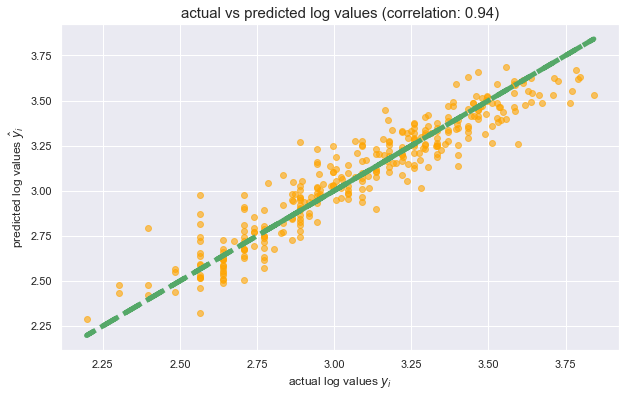

In [666]:
# graph actual vs predicted log milage

corr = round(y_train.corr(result.fittedvalues),2) # fitted and actual values are quite similar
plt.figure(figsize=(10,6))
plt.scatter(y_train,result.fittedvalues,c='orange', alpha=0.6)
plt.title(f'actual vs predicted log values (correlation: {corr})', fontsize=15)
plt.xlabel('actual log values $y_i$',fontsize=12)
plt.ylabel('predicted log values $\haty_i$',fontsize=12)
plt.plot(y_train,y_train,'g--',lw=5 )
plt.show()

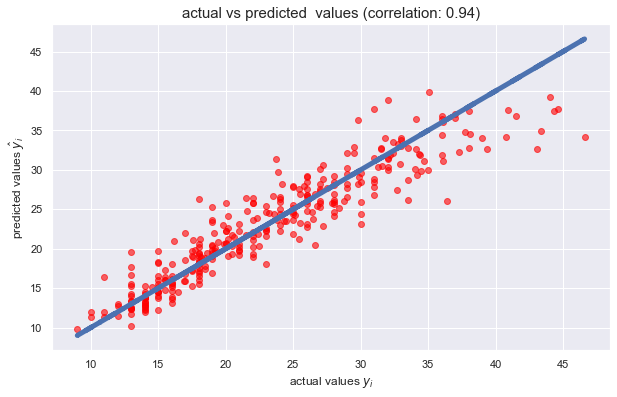

In [667]:
# graph actual vs predicted milage

plt.figure(figsize=(10,6))
plt.scatter(np.e**y_train,np.e**(result.fittedvalues),c='red', alpha=0.6)
plt.title(f'actual vs predicted  values (correlation: {corr})', fontsize=15)
plt.xlabel('actual values $y_i$',fontsize=12)
plt.ylabel('predicted values $\haty_i$',fontsize=12)
plt.plot(np.e**y_train,np.e**y_train,'b--',lw=5 )
plt.show()

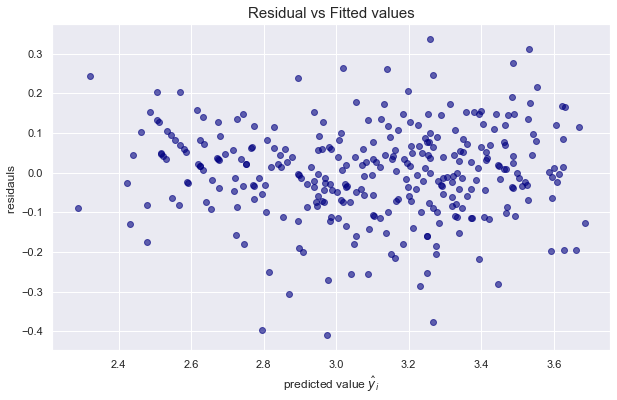

In [668]:
# predicted value vs residual
plt.figure(figsize=(10,6))
plt.scatter(result.fittedvalues,result.resid,c='navy', alpha=0.6)
plt.title('Residual vs Fitted values', fontsize=15)
plt.xlabel('predicted value $\haty_i$',fontsize=12)
plt.ylabel('residauls ',fontsize=12)
plt.show()

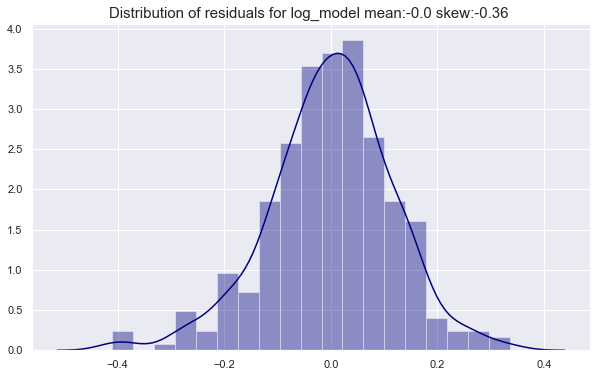

In [645]:
### Distriution of residuals - checking for normality

resid_mean = round(result.resid.mean(),3)
resid_skew = round(result.resid.skew(),3)

plt.figure(figsize=(10,6))
sns.distplot(result.resid, color='navy')
plt.title(f'Distribution of residuals for log_model mean:{resid_mean} skew:{resid_skew} ', fontsize=15)
plt.show()

re

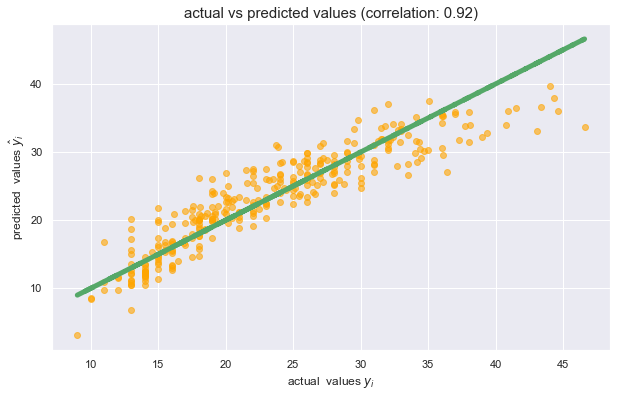

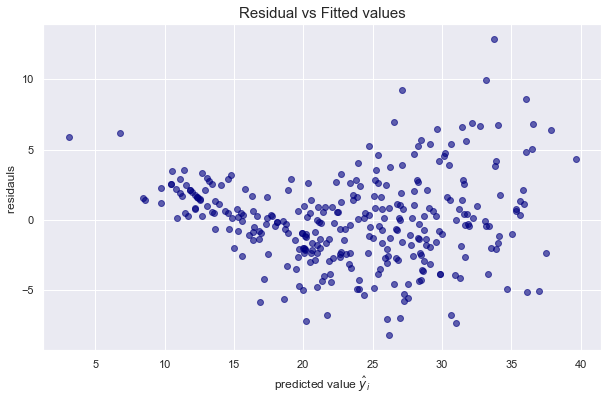

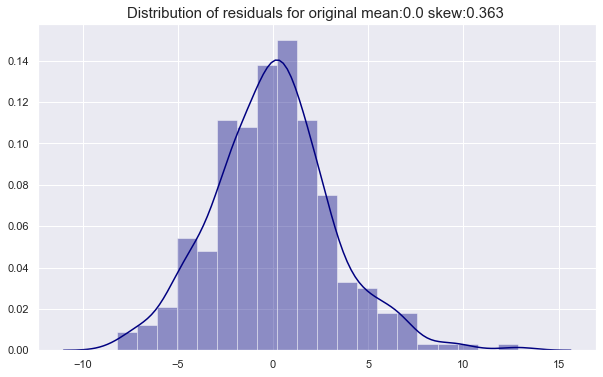

In [676]:
## using the original model without any dropping of columns
target = data1['mpg']
features = data1.drop(['mpg'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2, random_state=404)

# using the statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const)
result = model.fit()

# residuals
residuals = y_train-result.fittedvalues

# graph actual vs predicted milage

corr = round(y_train.corr(result.fittedvalues),2) # fitted and actual values are quite similar
plt.figure(figsize=(10,6))
plt.scatter(y_train,result.fittedvalues,c='orange', alpha=0.6)
plt.title(f'actual vs predicted values (correlation: {corr})', fontsize=15)
plt.xlabel('actual  values $y_i$',fontsize=12)
plt.ylabel('predicted  values $\haty_i$',fontsize=12)
plt.plot(y_train,y_train,'g--',lw=5 )
plt.show()

# predicted value vs residual
plt.figure(figsize=(10,6))
plt.scatter(result.fittedvalues,result.resid,c='navy', alpha=0.6)
plt.title('Residual vs Fitted values', fontsize=15)
plt.xlabel('predicted value $\haty_i$',fontsize=12)
plt.ylabel('residauls ',fontsize=12)
plt.show()

### Distriution of residuals - checking for normality

resid_mean = round(result.resid.mean(),3)
resid_skew = round(result.resid.skew(),3)

plt.figure(figsize=(10,6))
sns.distplot(result.resid, color='navy')
plt.title(f'Distribution of residuals for original mean:{resid_mean} skew:{resid_skew} ', fontsize=15)
plt.show()

# mean squared error
original_model_mse = round(result.mse_resid,3)
original_model_rsquared = round(result.rsquared,3)



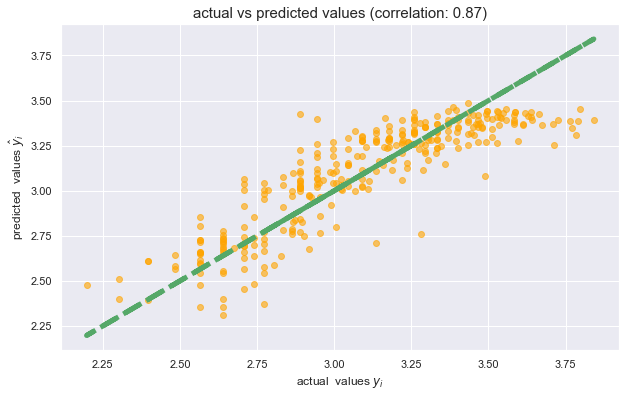

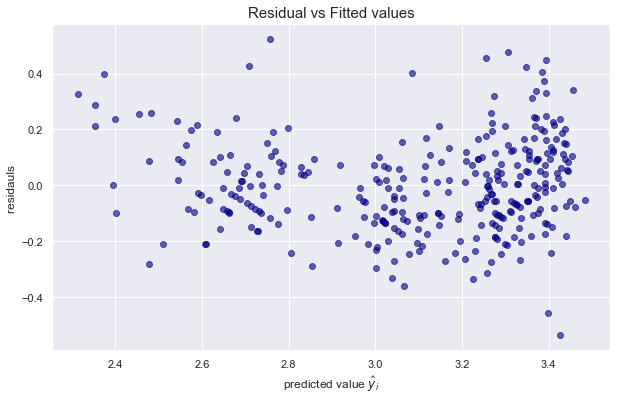

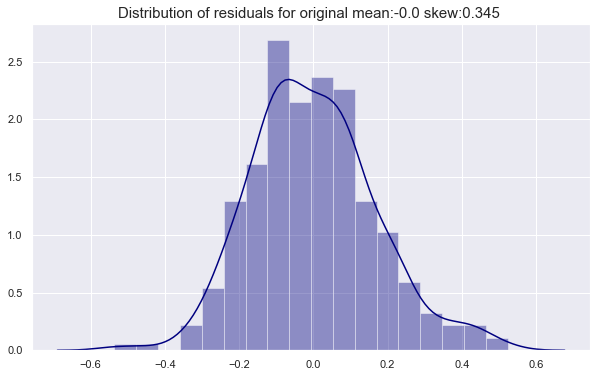

In [662]:
## using the  model dropping some key of columns
target = np.log(data1['mpg'])
features = data1.drop(['mpg','weight','model year','company_mean_encode'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2, random_state=404)

# using the statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const)
result = model.fit()

# residuals
residuals = y_train-result.fittedvalues

# graph actual vs predicted milage

corr = round(y_train.corr(result.fittedvalues),2) # fitted and actual values are quite similar
plt.figure(figsize=(10,6))
plt.scatter(y_train,result.fittedvalues,c='orange', alpha=0.6)
plt.title(f'actual vs predicted values (correlation: {corr})', fontsize=15)
plt.xlabel('actual  values $y_i$',fontsize=12)
plt.ylabel('predicted  values $\haty_i$',fontsize=12)
plt.plot(y_train,y_train,'g--',lw=5 )
plt.show()

# predicted value vs residual
plt.figure(figsize=(10,6))
plt.scatter(result.fittedvalues,result.resid,c='navy', alpha=0.6)
plt.title('Residual vs Fitted values', fontsize=15)
plt.xlabel('predicted value $\haty_i$',fontsize=12)
plt.ylabel('residauls ',fontsize=12)
plt.show()

### Distriution of residuals - checking for normality

resid_mean = round(result.resid.mean(),3)
resid_skew = round(result.resid.skew(),3)

plt.figure(figsize=(10,6))
sns.distplot(result.resid, color='navy')
plt.title(f'Distribution of residuals for original mean:{resid_mean} skew:{resid_skew} ', fontsize=15)
plt.show()

# mean squared error
reduced_key_model_mse = round(result.mse_resid,3)
reduced_key_model_rsquared = round(result.rsquared,3)



In [671]:
## using the log model and dropping displacement, acceleration, horsepower and cylinders

target = np.log(data1['mpg']) 

features = data1.drop(['mpg','acceleration','horsepower','displacement','cylinders'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2, random_state=404)

# using the statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const)
result = model.fit()

# mean squared error and r-sqaured
reduced_log_model_mse = round(result.mse_resid,3)
reduced_log_model_rsquared = round(result.rsquared,3)



In [679]:
pd.DataFrame({'R-squared':[reduced_log_model_rsquared, reduced_key_model_rsquared, original_model_rsquared],
             'Mean-squared-Error':[reduced_log_model_mse, reduced_key_model_rsquared, original_model_rsquared],
             'Root mean squared error':np.sqrt([reduced_log_model_mse, reduced_key_model_rsquared, original_model_rsquared])}, 
             index=['reduced_log_model','reduced_log_key_model','original_model'])


,R-squared,Mean-squared-Error,Root mean squared error
reduced_log_model,0.881,0.014,0.118322
reduced_log_key_model,0.756,0.756,0.869483
original_model,0.839,0.839,0.915969


the transformed model where we omitted correlated variable has higher r-squared and lower mse compared to original
model without log transformation and model where we intentionally left out important variable 

R-squared is realative measure of fit
and MSE is the absolute measure of fit